## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

### Load needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load our dataset and view the first five rows

In [2]:
df = pd.read_csv('product_sales.csv')
df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


## 1. Data Validation

In [3]:
# Get the shape of our data ie number of rows and columns
rows, columns = df.shape
print('Number of Rows:', rows,'rows')
print('Number of Columns:', columns,'columns')

Number of Rows: 15000 rows
Number of Columns: 8 columns


### Our dataset contains 15000 rows and 8 columns

### Find below the details of the columns in our dataset as presented

Column Name                                     

- week:                   Week sale was made, counted as weeks since product launch
- sales_method:            Character, which of the three sales methods were used for that customer
- customer_id:             Character, unique identifier for the customer
- nb_sold:                 Numeric, number of new products sold
- revenue:                 Numeric, revenue from the sales, rounded to 2 decimal places.
- years_as_customer:       Numeric, number of years customer has been buying from us (company founded in 1984)
- nb_site_visits:          Numeric, number of times the customer has visited our website in the last 6 months
- state:                   Character, location of the customer i.e. where orders are shipped


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


### Lets Get our dataset description and summary statistics

In [5]:
df.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,15000.000000,15000.000000,13926.000000,15000.000000,15000.000000
mean,3.098267,10.084667,93.934943,4.965933,24.990867
std,1.656420,1.812213,47.435312,5.044952,3.500914
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,2.000000,9.000000,52.470000,1.000000,23.000000
50%,3.000000,10.000000,89.500000,3.000000,25.000000
75%,5.000000,11.000000,107.327500,7.000000,27.000000
max,6.000000,16.000000,238.320000,63.000000,41.000000


In [6]:
df.describe(include='object')

,sales_method,customer_id,state
count,15000,15000,15000
unique,5,15000,50
top,Email,2e72d641-95ac-497b-bbf8-4861764a7097,California
freq,7456,1,1872


### Observations on our dataset

1. We have null values in our revenue column.

2. The sales_method column has 5 unique groupings instead of 3 unique groupings.

3. The years_as_customer as years greater than when it was founded 39 years ago.

### Lets check for duplicates

In [7]:
df.duplicated().sum()

0

### There are no duplicate in our dataset

### Lets check for null values

In [8]:
df.isnull().sum()

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64

#### We have some 1074 missing values in the revenue column. The missing values are above 7% of our dataset

### Let's investigate

### Lets plot the distribution of the revenue column with missing values to ascertain how to impute the null values

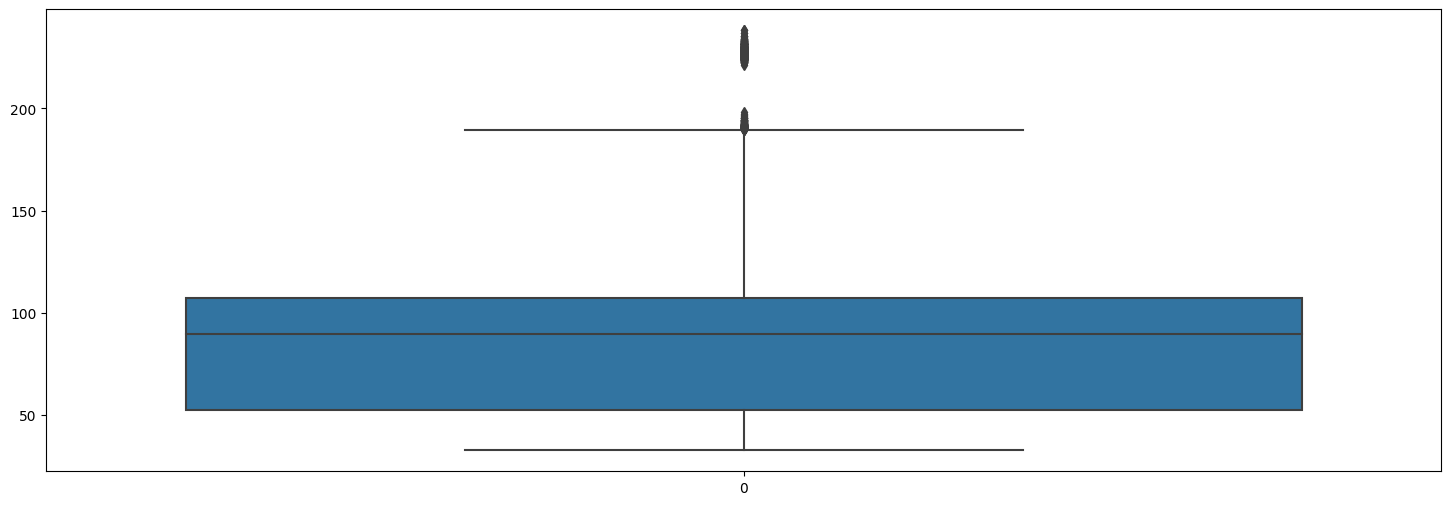

In [9]:
plt.figure(figsize=(18,6))
sns.boxplot(df['revenue'])
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_24724\1462072303.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['revenue'], hist=False)


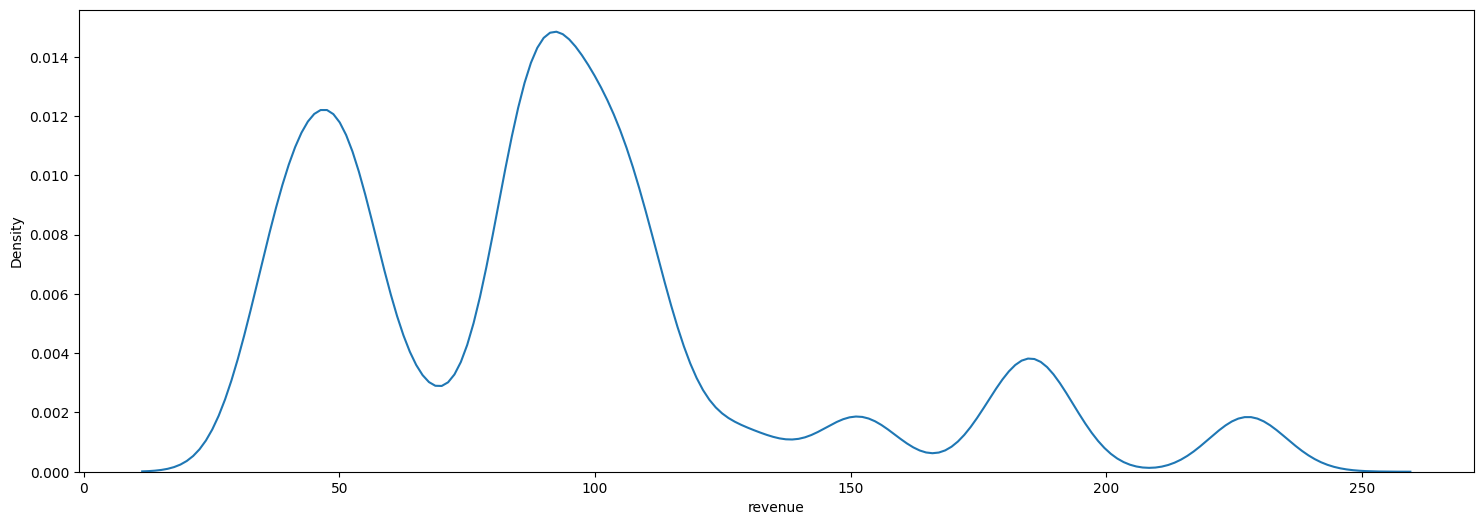

In [10]:
plt.figure(figsize=(18,6))
sns.distplot(df['revenue'], hist=False)
plt.show()

### The 'revenue' column is right skewwed with outliers. So we use median of the distribution as our imputation.

In [11]:
df["revenue"] = df["revenue"].fillna(df["revenue"].median())

### Lets Check for null values after imputation to ascertain.

In [12]:
df.isnull().sum()

week                 0
sales_method         0
customer_id          0
nb_sold              0
revenue              0
years_as_customer    0
nb_site_visits       0
state                0
dtype: int64

### Our Dataset has no missing values after imputation 

### Lets investigate the years_as_customer column. The company was founded in 1984.

### As such the maximum years_as_customer should be 39 (1984 to 2023) while the minimum should be 0

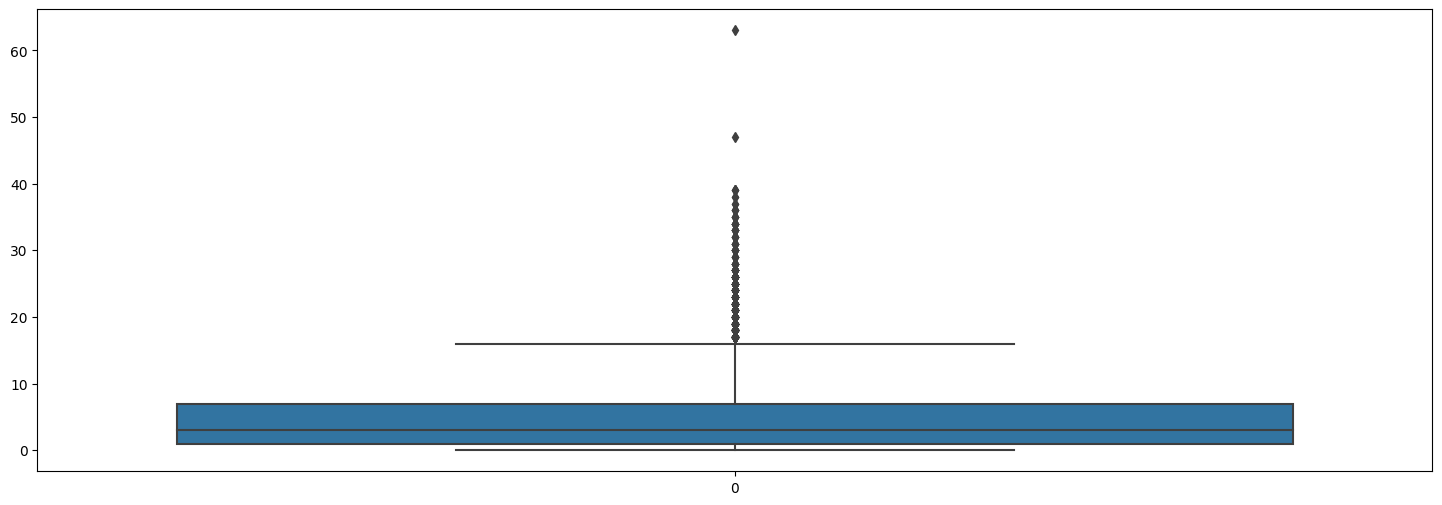

In [13]:
plt.figure(figsize=(18,6))
sns.boxplot(df['years_as_customer'])
plt.show()

### We have years_as_customers greater than 39. As such any maximum years_as_customer greater than 39 is wrong.

### Lets compute any years greater than 39 as 39.

In [14]:
# Set the maximum value to 39
max_value = 39

df['years_as_customer'] = df['years_as_customer'].clip(upper=max_value)

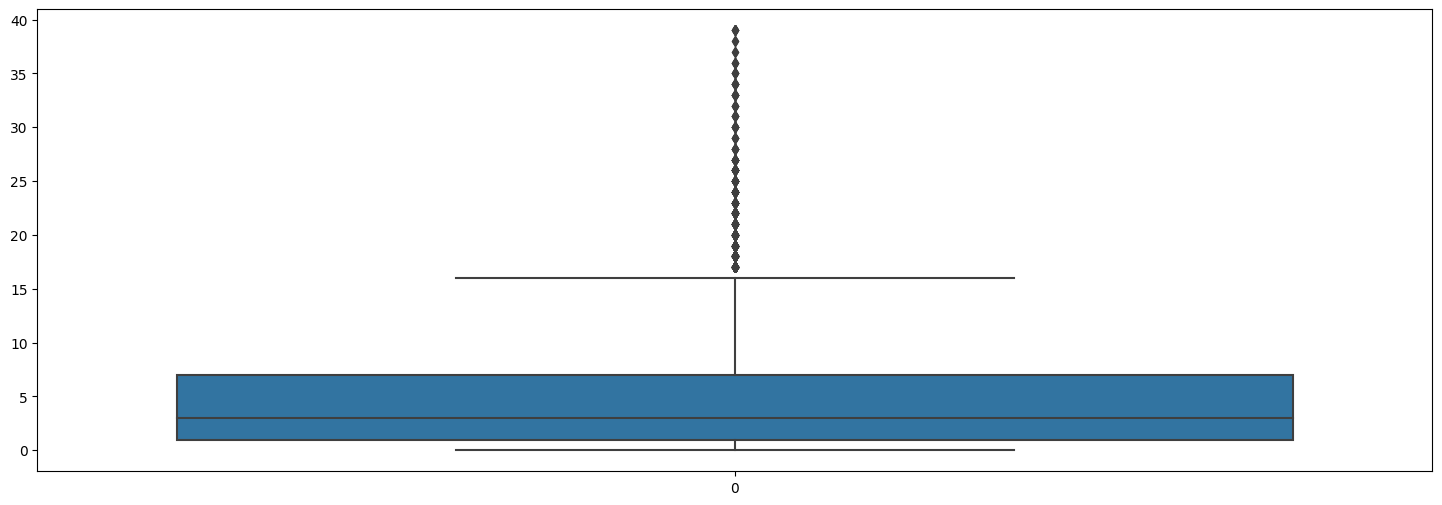

In [15]:
plt.figure(figsize=(18,6))
sns.boxplot(df['years_as_customer'])
plt.show()

### Lets investigate the sales_method column and clean the column.

### The sales_method was presented as 5 unique sales method but we should have 3 unique method.

In [16]:
df['sales_method'].value_counts()

Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
Name: sales_method, dtype: int64

In [17]:
df['sales_method'] = df['sales_method'].replace('em + call', 'Email + Call')
df['sales_method'] = df['sales_method'].str.replace('email','Email')
df['sales_method'].value_counts()

Email           7466
Call            4962
Email + Call    2572
Name: sales_method, dtype: int64

### Let investigate the remaining columns

In [18]:
df['customer_id'].nunique()

15000

In [19]:
df['nb_sold'].value_counts()

10    3677
9     3535
11    2439
8     1941
12    1088
13     939
7      698
15     555
14      97
16      31
Name: nb_sold, dtype: int64

In [20]:
df['nb_site_visits'].value_counts()

25    1688
26    1645
24    1601
23    1478
27    1440
22    1200
28    1175
21     908
29     893
30     654
20     600
19     426
31     371
32     250
18     217
33     114
17     113
16      80
34      51
35      33
15      31
36      14
14       7
37       5
13       4
12       1
41       1
Name: nb_site_visits, dtype: int64

In [21]:
df['state'].value_counts()

California        1872
Texas             1187
New York           965
Florida            904
Illinois           617
Pennsylvania       598
Ohio               566
Michigan           498
Georgia            489
North Carolina     459
New Jersey         434
Virginia           372
Indiana            354
Tennessee          340
Washington         335
Arizona            321
Missouri           311
Massachusetts      294
Maryland           263
Wisconsin          253
Minnesota          245
Colorado           230
Louisiana          230
Oregon             229
South Carolina     224
Alabama            214
Kentucky           213
Oklahoma           196
Connecticut        179
Iowa               165
Kansas             142
Mississippi        139
Arkansas           132
Utah               124
Nevada             102
Nebraska            91
West Virginia       85
New Mexico          84
Hawaii              72
Maine               63
Idaho               62
New Hampshire       53
Montana             45
Rhode Islan

In [22]:
df['week'].value_counts()

1    3721
4    2575
5    2574
2    2491
3    2411
6    1228
Name: week, dtype: int64

### Lets validate our dataset

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            15000 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [24]:
df.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,3.098267,10.084667,93.617401,4.963800,24.990867
std,1.656420,1.812213,45.719775,5.026295,3.500914
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,2.000000,9.000000,53.040000,1.000000,23.000000
50%,3.000000,10.000000,89.500000,3.000000,25.000000
75%,5.000000,11.000000,106.070000,7.000000,27.000000
max,6.000000,16.000000,238.320000,39.000000,41.000000


In [25]:
df.describe(include='object')

,sales_method,customer_id,state
count,15000,15000,15000
unique,3,15000,50
top,Email,2e72d641-95ac-497b-bbf8-4861764a7097,California
freq,7466,1,1872


### Find below the details of the columns in our dataset after Cleaning and Validation.

Column Name                                     

- week:                    Week sale was made, counted as weeks since product launch as espected.

- sales_method:            Character, was presented as 5 unique sales method due errors in spellings, it was corrected and cleaned. We now have 3 unique sales methods.

- customer_id:             Character, unique identifier for the customer as espected.

- nb_sold:                 Numeric, number of new products sold as espected.

- revenue:                 Numeric, revenue from the sales, rounded to 2 decimal places. It has 1074 missing values and are more than 7% of our dataset, which were replaced by the median.

- years_as_customer:       Numeric, number of years customer has been buying from us (company founded in 1984). Some years were greater than the year the company was founded. Those years were clipped to the maximum year since company was founded.

- nb_site_visits:          Numeric, number of times the customer has visited our website in the last 6 months as espected.

- state:                   Character, location of the customer i.e. where orders are shipped. As espected.


## 2. EXPLORATORY DATA ANALYSIS

### Customers per each sales method approach.

In [26]:
df['sales_method'].value_counts(normalize=True)

Email           0.497733
Call            0.330800
Email + Call    0.171467
Name: sales_method, dtype: float64

Text(0.5, 1.0, 'Customer Count For Each Sales Method')

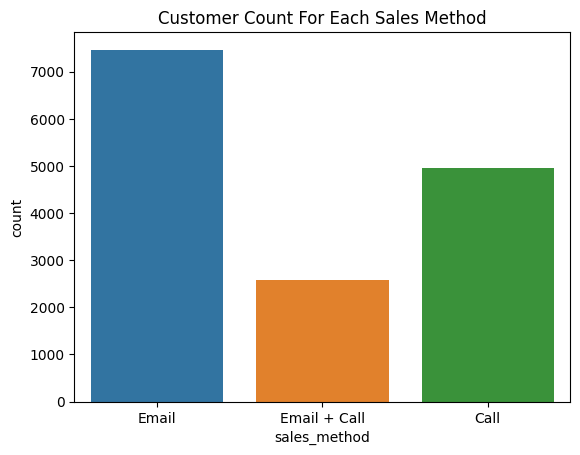

In [27]:
sns.countplot(data=df, x='sales_method')
plt.title('Customer Count For Each Sales Method')

## Customers per each sales method approach

1. 7466 (50%) customers for Email sales method approach.
2. 4962 (33%) customers for Phone Call sales method appraoch.
3. 2572 (17%) customers for a combination of Email and phone Calls sales method approach.

### Spread of Revenue

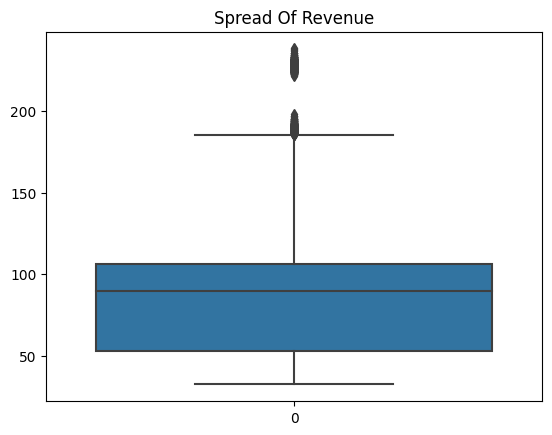

In [28]:
sns.boxplot(df['revenue'])
plt.title('Spread Of Revenue')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_24724\1507690479.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['revenue'])


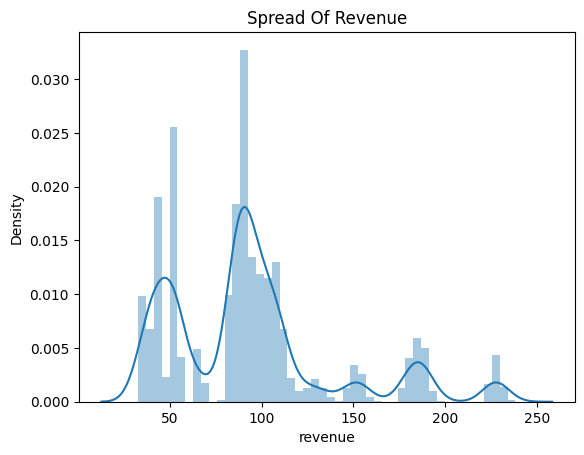

In [29]:
sns.distplot(df['revenue'])
plt.title('Spread Of Revenue')
plt.show()

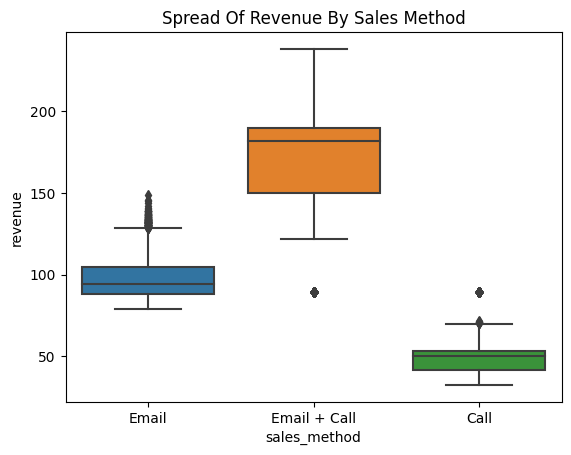

In [30]:
sns.boxplot(x= df['sales_method'], y = df['revenue'])
plt.title('Spread Of Revenue By Sales Method')
plt.show()

Text(0.5, 1.0, 'Revenue For Each Sales Method')

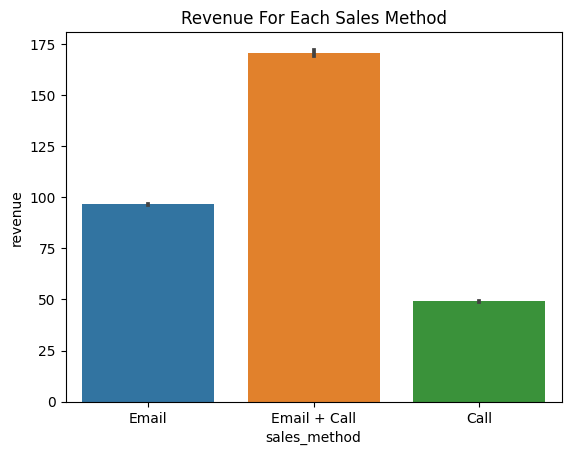

In [31]:
sns.barplot(data=df, x='sales_method', y='revenue')
plt.title('Revenue For Each Sales Method')

Text(0.5, 1.0, 'Revenue per Week For Each Sales Method')

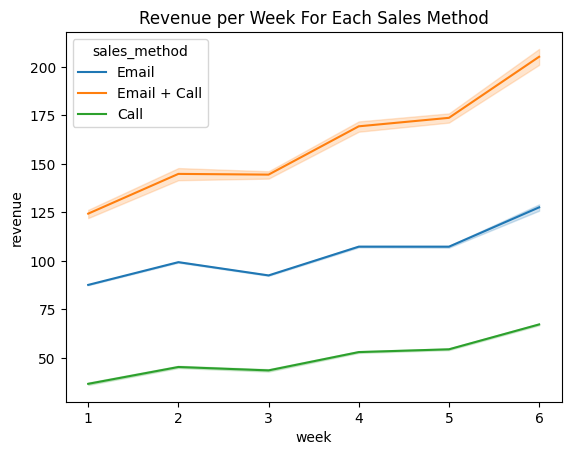

In [32]:
sns.lineplot(data=df, x='week', y = 'revenue', hue='sales_method')
plt.title('Revenue per Week For Each Sales Method')

Text(0.5, 1.0, 'Count of Years as Customer')

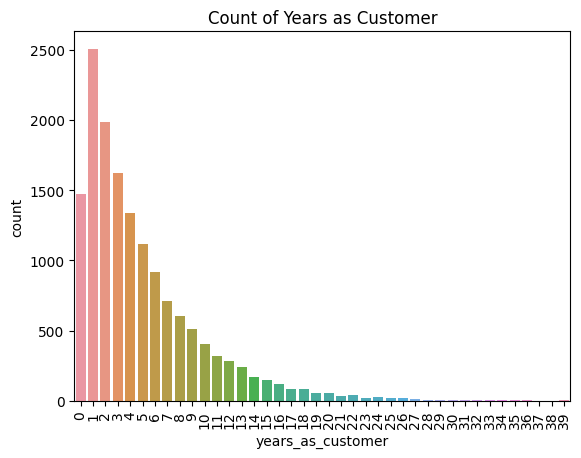

In [33]:
sns.countplot(data=df, x='years_as_customer')
plt.xticks(rotation=90)
plt.title('Count of Years as Customer')

Text(0.5, 1.0, 'Revenue per Number of Site Visits')

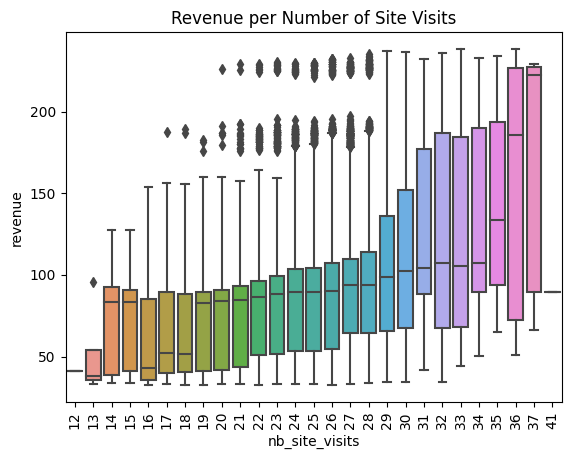

In [34]:
sns.boxplot(data=df, x='nb_site_visits', y='revenue')
plt.xticks(rotation=90)
plt.title('Revenue per Number of Site Visits')

Text(0.5, 1.0, 'Customer count by State')

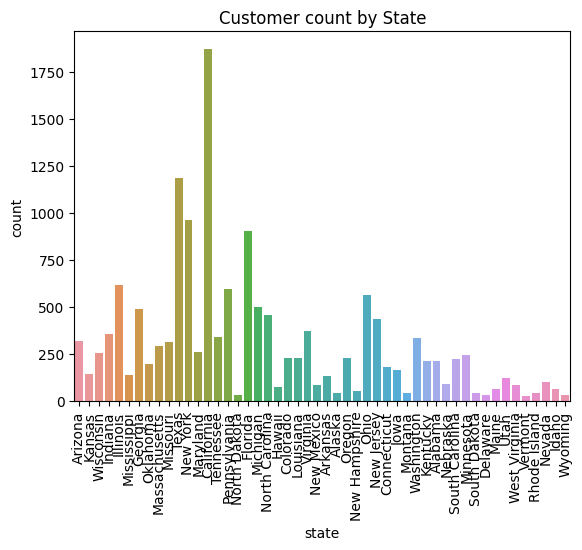

In [35]:
sns.countplot(data=df, x='state')
plt.xticks(rotation=90)
plt.title('Customer count by State')

## Findings/Observations

1. Customers per each sales method approach are 7466 (50%) customers for Email sales method approach, 4962 (33%) customers for Phone Call sales method appraoch, and 2572 (17%) customers for a combination of Email and phone Calls sales method approach.

2. Revenue is right skewed with outliers on the upper quartile. It has a mean of 93.62, median of 89.5, maximimum value of 238.32, and minimum value of 32.54.

3. Email+Call sales method generates the most revenue followed by Email sales method and the least revenue generator is Call sales method.

4. Revenue increases per week for all the sales methods, with the Email+Call having the largest revenue growth per week followed by Email sales method.

5. Customer number has increase over time. With more customer joining the company in the last ten years.

6. The higher the number of times a customer visited the website in the last 6 months, the higher the revenue.

7. Maryland has the highest number of customers.
 

## 3. Definition of a metric for the business to monitor

**1. The business goal has been on selling products to enable our customers to be more creative, focused
on tools for brainstorming. We have tested three different sales strategies for this, targeted
email and phone calls, as well as combining the two**


**2. The Key Perfomance Indicators (KPI) in this case is the revenue generated and customer engagement/conversion rate from the sales methods of Email, Email+Call and Call.**

**3. Establish a baseline: From the data provided the customer engagement/conversion rate are 7466 (50%) customers for Email sales method approach, 4962 (33%) customers for Phone Call sales method appraoch, and 2572 (17%) customers for a combination of Email and phone Calls sales method approach.**

**4. With our baseline we can monitor the revenue generated from each sales method. With current data provided we noticed that customer engagement/conversion rate is 17% for Email+Call but it generated the highest revenue.**

## Summary 

**1. Customers per each sales method approach are 7466 (50%) customers for Email sales method approach, 4962 (33%) customers for Phone Call sales method appraoch, and 2572 (17%) customers for a combination of Email and phone Calls sales method approach.**

**2. Email+Call sales method generates the most revenue followed by Email sales method and the least revenue generator is Call sales method.**

**3. Revenue increases per week for all the sales methods, with the Email+Call having the largest revenue growth per week followed by Email sales method.**

**4. Customer number has increase over time. With more customer joining the company in the last ten years.**

**5. The higher the number of times a customer visited the website in the last 6 months, the higher the revenue.**

**6. Maryland has the highest number of customers.**



## Recommendation

**1. We will recommend the use of Email+Call sales method as this method has substantial revenue growth per week and the highest revenue. More effort should be on the Email+Call. With just 17% customer engagement/conversion rate it still generated the highest revenue**

**2. We will also recommend the continue use of Email sales method as this method has a better revenue growth per week, a 50% customer engagement/conversion rate, and the second highest revenue after the Email+Call. It is far better than the Call sales method**

**3. The Email+Call sale method requires an email at product launch and a ten minutes calls a week after which is a decent effort when comapred to the revenue**